In [ ]:
print('hi')

hi


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
#Convert mappings into a dictionary
mapping = pd.read_csv('Mapping.csv')
#print(mapping.columns)
mapping = mapping.drop(columns = ['Unnamed: 0'])

emojis = mapping['emoticons'].to_list()
emoji_number = mapping['number'].to_list()
mapping = dict(zip(emoji_number, emojis))
mapping

{0: '😜',
 1: '📸',
 2: '😍',
 3: '😂',
 4: '😉',
 5: '🎄',
 6: '📷',
 7: '🔥',
 8: '😘',
 9: '❤',
 10: '😁',
 11: '🇺🇸',
 12: '☀',
 13: '✨',
 14: '💙',
 15: '💕',
 16: '😎',
 17: '😊',
 18: '💜',
 19: '💯'}

PREPROCESSING

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk  #natural language processing
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem.porter import *

my_columns = ["Index", "Text", "Label"]

#read into pandas dataframe
sampled = pd.read_csv('Train.csv',
                      skiprows = 1,
                      names=my_columns,
                      usecols = [1,2])

#take random sample of 30,000
df = sampled.sample(n=30000, random_state=1)

df.reset_index(drop=True, inplace=True)
print(df.head())

def clean_text(text):
    #remove tags
    no_tag = re.sub(r'@[A-Za-z0-9]+', '', text)
    #remove numbers
    no_num = re.sub(r'[0-9]+', '', no_tag)
    #remove punctuation
    no_punc = re.sub(r'[^\w\s]', '', no_num)
    #lower
    lowercase = no_punc.lower()
    #split based on whitespace
    splitted = lowercase.split()
    #remove stop words
    no_stopwords = [w for w in splitted if w not in stopwords.words("english")]
    #get base form of words
    porter = PorterStemmer()
    stemmed = [porter.stem(w) for w in no_stopwords]
    return stemmed

df['Text'] = df['Text'].apply(clean_text)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Text  Label
0  Were not looking the right way but thats my sh...      8
1  So listen........ #SelfLove lol @ Washington, ...      3
2  #guaranteed to sell out #ordertoday #liveallou...      7
3  Pinkish day with my not so arti arti Bebe love...     15
4                      young metro don't trust you\n     17


,Text,Label
0,"[look, right, way, that, shordi, touch, class,...",8
1,"[listen, selflov, lol, washington, district, c...",3
2,"[guarante, sell, ordertoday, liveallourdream, ...",7
3,"[pinkish, day, arti, arti, bebe, love, pinkday...",15
4,"[young, metro, dont, trust]",17
...,...,...
29995,"[hbd, bff, thank, make, hair, fall, fellini, c...",9
29996,"[cant, dese, fool, limelit, cafe]",3
29997,"[join, us, friday, villafriday, villaloungedal...",7
29998,"[alreadi, told, lil, brother, baccstreet_bino,...",3


In [ ]:
#get statistics on data
from collections import Counter

print(type(df['Text'][0]))
print(df['Text'][0])
all_words = [word for entry in df['Text']for word in entry]
print("Number of words:", len(all_words))
unique_words = set(all_words)
print("Number unique words:", len(unique_words))

word_freq = Counter(all_words)

top_words = dict(word_freq.most_common(30000))
top_word_freq = sum(top_words.values())
total_word_freq = sum(word_freq.values())
print(f"Frequency for top 30000 words: {top_word_freq/total_word_freq:.2%}")


lengths = df['Text'].apply(lambda x: len(x))
print("99 percent", np.percentile(lengths, 99))

print("mean", lengths.mean())

<class 'list'>
['look', 'right', 'way', 'that', 'shordi', 'touch', 'class', 'candlelight']
Number of words: 213992
Number unique words: 36743
Frequency for top 30000 words: 96.85%
99 percent 12.0
mean 7.133066666666667


In [ ]:
#check balance of data
print(df.info())
print(df.head())
df['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    30000 non-null  object
 1   Label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB
None
                                                Text  Label
0  [look, right, way, that, shordi, touch, class,...      8
1  [listen, selflov, lol, washington, district, c...      3
2  [guarante, sell, ordertoday, liveallourdream, ...      7
3  [pinkish, day, arti, arti, bebe, love, pinkday...     15
4                        [young, metro, dont, trust]     17


Label
9     6502
3     2967
2     2956
7     1983
15    1641
13    1409
16    1173
17    1165
1     1085
14    1035
11    1022
5      891
8      874
6      836
12     804
4      784
19     747
10     744
18     725
0      657
Name: count, dtype: int64

Emoji Percentages: Label
❤     6502
😂     2967
😍     2956
🔥     1983
💕     1641
✨     1409
😎     1173
😊     1165
📸     1085
💙     1035
🇺🇸    1022
🎄      891
😘      874
📷      836
☀      804
😉      784
💯      747
😁      744
💜      725
😜      657
Name: count, dtype: int64


<ipython-input-5-8ce5da58eda6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distr.index,
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyth

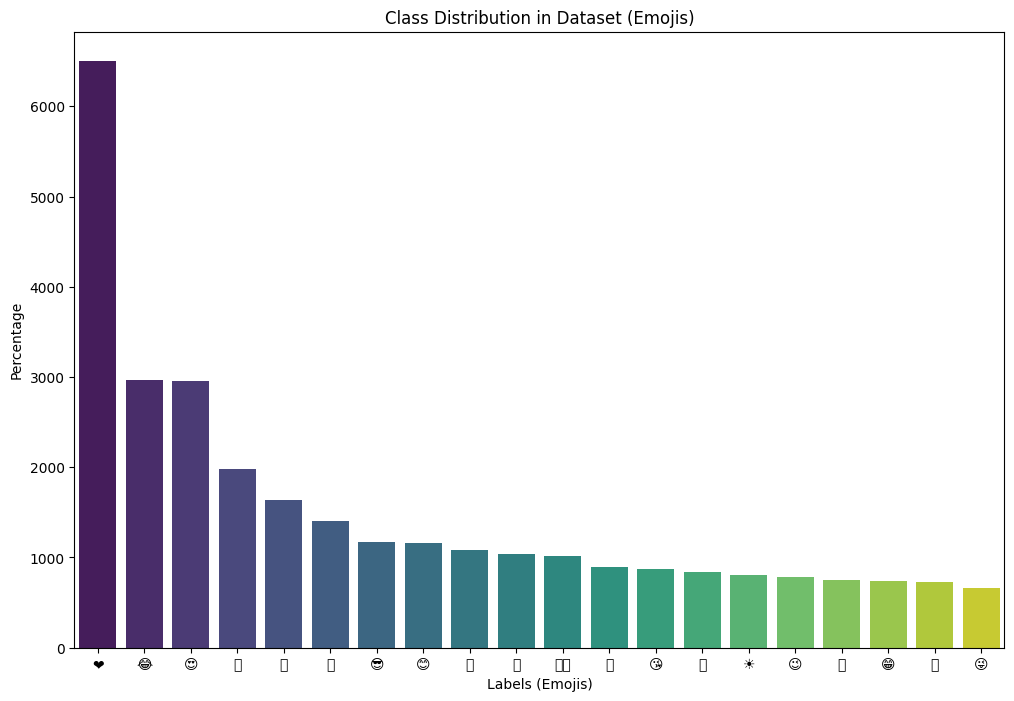

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#get the ditribution
distr = df['Label'].value_counts()

# Map the index to emojis
distr.index = distr.index.map(mapping)
print("Emoji Percentages:", distr)

#print bar plot of distributions
plt.figure(figsize=(12, 8))
sns.barplot(x=distr.index,
            y=distr.values,
            palette='viridis')
plt.title('Class Distribution in Dataset (Emojis)')
plt.xlabel('Labels (Emojis)')
plt.ylabel('Percentage')
plt.show()

In [ ]:
trainX = df['Text'].values
trainY = df['Label'].values

trainX.shape, trainY.shape

((30000,), (30000,))

In [ ]:
embedding_index = {}

with open('glove.6B.50d.txt', 'r') as glove:
  for line in glove:
      #split every line by whitespace to get each embedding value
      values = line.split()
      #get embedding's word
      word = values[0]
      #map embeddings to word in a dict
      emb = np.array(values[1:], dtype ='float')
      embedding_index[word] = emb

def get_embedding_output(X):
    maxLen = 20
    embedding_dim = 50
    embedding_output = np.zeros((len(X), maxLen, embedding_dim))

    for ix in range(len(X)):
        my_example = X[ix]
        for ij in range(min(len(my_example), maxLen)):
            word_lower = my_example[ij].lower()
            if embedding_index.get(word_lower) is not None:
                embedding_output[ix][ij] = embedding_index[word_lower]

    return embedding_output

trainX_glove = get_embedding_output(trainX)
trainY = df['Label'].values
trainX_glove.shape, trainY.shape

((30000, 20, 50), (30000,))

In [ ]:
from keras.utils import to_categorical
trainY = to_categorical(trainY)
print(trainY.shape)
trainY[1]

(30000, 20)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
#SMOTE for oversampling
from imblearn.over_sampling import SMOTE
trainX_glove = trainX_glove.reshape(len(trainX_glove), -1)

oversample = SMOTE()
X, y = oversample.fit_resample(trainX_glove, trainY)

In [ ]:
# get the new distribution of the labels
counts = np.sum(y, axis=0)
label_distribution = pd.Series(counts, index=[f"{i}" for i in range(len(counts))])
print(label_distribution)

0     6502
1     6502
2     6502
3     6502
4     6502
5     6502
6     6502
7     6502
8     6502
9     6502
10    6502
11    6502
12    6502
13    6502
14    6502
15    6502
16    6502
17    6502
18    6502
19    6502
dtype: int64


In [ ]:
X = X.reshape(-1, 20, 50)
X.shape, y.shape

((130040, 20, 50), (130040, 20))

In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
testY

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape = (20,50)),
    Dropout(0.3),
    Bidirectional(LSTM(units=64)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(20, activation='softmax')
])
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 20, 256)           183296    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 20, 256)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [ ]:
hist = model.fit(trainX, trainY, validation_split=0.2, shuffle=True, batch_size=64, epochs=30)

Epoch 1/30
1301/1301 [==============================] - 23s 12ms/step - loss: 2.7513 - accuracy: 0.1624 - val_loss: 2.6030 - val_accuracy: 0.2104
Epoch 2/30
1301/1301 [==============================] - 13s 10ms/step - loss: 2.5025 - accuracy: 0.2450 - val_loss: 2.3547 - val_accuracy: 0.2903
Epoch 3/30
1301/1301 [==============================] - 13s 10ms/step - loss: 2.2541 - accuracy: 0.3209 - val_loss: 2.1252 - val_accuracy: 0.3562
Epoch 4/30
1301/1301 [==============================] - 13s 10ms/step - loss: 2.0073 - accuracy: 0.3949 - val_loss: 1.9321 - val_accuracy: 0.4238
Epoch 5/30
1301/1301 [==============================] - 13s 10ms/step - loss: 1.7903 - accuracy: 0.4582 - val_loss: 1.7753 - val_accuracy: 0.4758
Epoch 6/30
1301/1301 [==============================] - 13s 10ms/step - loss: 1.6085 - accuracy: 0.5144 - val_loss: 1.6380 - val_accuracy: 0.5132
Epoch 7/30
1301/1301 [==============================] - 13s 10ms/step - loss: 1.4526 - accuracy: 0.5569 - val_loss: 1.5307 -

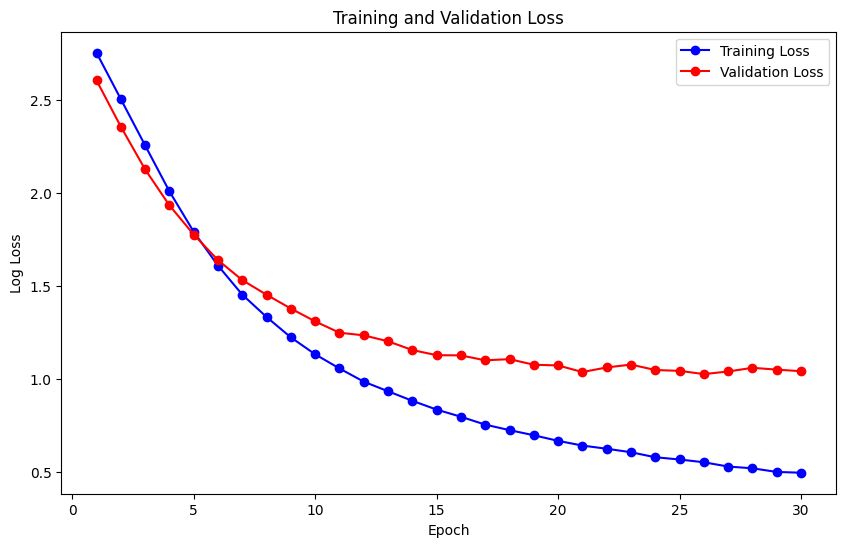

In [ ]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

plt.show()


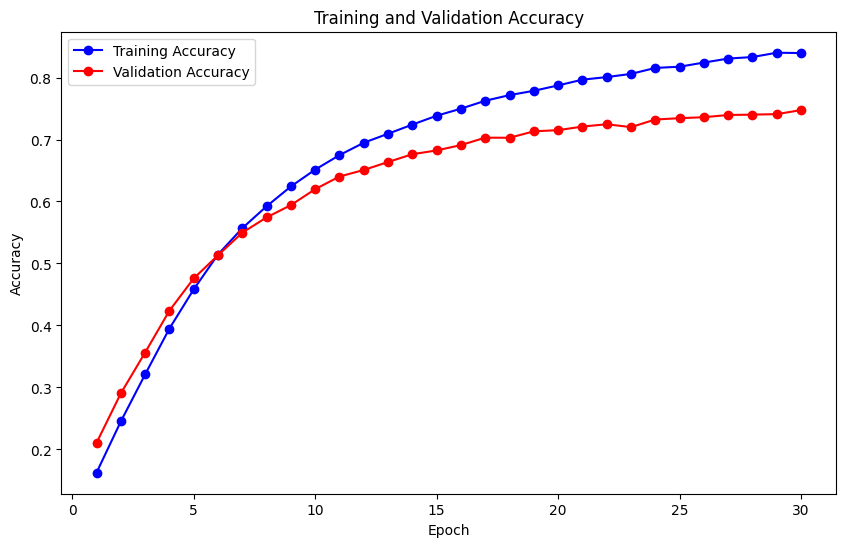

In [ ]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

import matplotlib.pyplot as plt

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
model.evaluate(testX, testY)

813/813 [==============================] - 4s 4ms/step - loss: 1.0279 - accuracy: 0.7461


[1.0279043912887573, 0.746116578578949]

In [ ]:
predictions = model.predict(testX)
print(predictions)

813/813 [==============================] - 5s 4ms/step
[[8.21791801e-10 9.99868989e-01 5.56874784e-06 ... 9.90407401e-08
  7.77421905e-10 2.15003293e-10]
 [1.65950153e-14 5.72187506e-11 1.10850078e-06 ... 4.67754280e-09
  1.10822580e-10 2.70705298e-11]
 [1.34036845e-05 1.15226714e-04 8.17677304e-02 ... 4.51079191e-04
  2.13151751e-03 2.55848954e-06]
 ...
 [1.75339653e-06 9.83550586e-03 1.12558883e-02 ... 8.80435691e-05
  1.90600939e-08 1.62978738e-03]
 [2.41164798e-06 1.44281099e-03 3.11004102e-01 ... 9.21873096e-03
  1.42992576e-04 1.22476229e-03]
 [5.91936100e-07 1.99739384e-06 1.18271960e-03 ... 7.92850100e-04
  1.53355961e-06 1.00858369e-06]]


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[ 1  5 15 ...  3  2 16]


In [ ]:
message = "Thank you for listening to our presentation"
words = message.split()
words = [word.lower() for word in words]
input_data = get_embedding_output([words])
predicted_emoji = model.predict(input_data)
predicted_class = np.argmax(predicted_emoji, axis=1)
print(message, ":", mapping[predicted_class[0]])

1/1 [==============================] - 0s 67ms/step
Thank you for listening to our presentation : ❤


In [ ]:
print(testY)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
actual_classes = np.argmax(testY, axis=1)
actual_classes

array([ 1,  5, 15, ...,  3, 13, 16])

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

precision = precision_score(actual_classes, predicted_classes, average='macro')
recall = recall_score(actual_classes, predicted_classes, average='macro')
f1 = f1_score(actual_classes, predicted_classes, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7335360947627061
Recall: 0.7469837714244594
F1 Score: 0.7372334975734038


In [ ]:
actual_emojis = [mapping[label] for label in actual_classes]
predicted_emojis = [mapping[label] for label in predicted_classes]

In [ ]:
df2 = pd.read_csv('Train.csv',
                 skiprows = 1,
                 names=my_columns,
                 index_col=0)

texts = df2['Text'].tolist()

for i in range(0, len(actual_emojis), 8):
    print(f"Text: {texts[i]}, Actual: {actual_emojis[i]}, Predicted: {predicted_emojis[i]}")


Streaming output truncated to the last 5000 lines.
Text: Fav cityyyy #nyc ️ #latitudetalent @user #nycfashion #nycmodelling #midtown @ New…
, Actual: 📸, Predicted: ✨
Text: Rhema for Christmas lights and cocoa. @ Rhema Christmas Lights
, Actual: ❤, Predicted: 😊
Text: Happy 4th of July, all! @ United States
, Actual: 😜, Predicted: 😜
Text: Just your average day at Franciscan University of Steubenville. @ Franciscan University of…
, Actual: 💙, Predicted: 💙
Text: This woman is my rock strongest, hardest working, patient, &amp; most…
, Actual: 😉, Predicted: 😉
Text: #summer #editorial #california #behindthescenes #model #hot @ Mojave Desert
, Actual: 😍, Predicted: 😂
Text: We keep it lowkey @ Low Key Dueling Pianos
, Actual: 💙, Predicted: 😉
Text: I'm happy that my first time out in months was with great friends! @ City Tap and The Attic
, Actual: 📷, Predicted: 📷
Text: Me an my sis got Photo bomb by tiff in the background @ Chell's…
, Actual: 💙, Predicted: 💙
Text: Day 5 of #5daysofgiveaways We 

In [ ]:
hearts=0
mislabeled = 0
same_heart= 0
print("Total number of predictions:", len(actual_emojis))
for i in range(0, len(actual_emojis)):
  if(actual_classes[i] in [9, 14, 15, 18]):
    hearts = hearts +1
  if((actual_classes[i] in [9, 14, 15, 18]) and (predicted_classes[i] in [9, 14, 15, 18])):
    if(actual_classes[i] != predicted_classes[i]):
      mislabeled = mislabeled+1
    if(actual_classes[i] == predicted_classes[i]):
      same_heart = same_heart+1

print("Total number of actual hearts:", hearts)
print("Total number of correctly labeled hearts:", same_heart)
print("Total number of mislabeled hearts:", mislabeled)

Total number of predictions: 26008
Total number of actual hearts: 5190
Total number of correctly labeled hearts: 3141
Total number of mislabeled hearts: 677
